## Mapping of Quantum Circuits to IBM QX Architectures [Reference](https://ieeexplore.ieee.org/document/8382253)

### By [Mirna Hosny](https://www.linkedin.com/in/mirna-h-457321187/) 

#### A member in Alexandria Quantum Computing Group [AleQCG](https://www.linkedin.com/company/20115017)

### 1. Intrduction

Quantum circuits are getting more efficient to perform different functions and more complex with the proposed approaches of new libraries and unitary matrices. Not all quantum gates can be implemented on a real quantum computer as IBMQ. 

IBMQ can operate with 5 physical qubits as in QX2 and QX4 architectures and can operate with 16 physical qubits as in QX3 and QX5 architectures. The physical qubits are connected through coplanar waveguide bus resonators. Each architecture has a coupling-map that illustrates the possible operations that can be applied on these qubits using microwave pulses. 

IBM QX2 and QX4 architectures:
<table>
<tr>
<td><strong>QX2</strong><td>
<td>   </td>
<td><strong>QX4</strong></td>
</tr>
<tr>
<td><img src="images/ibmqx2-connections.png" alt="IBM QX2 architecture" style="width: 50%;"/><td>
<td>   </td>
<td><img src="images/ibmqx4-connections.png" alt="IBM QX4 architecture" style="width: 30%;"/></td>
</tr>
</table>

IBM QX3 and QX5 architectures:
<table>
<tr>
<td><strong>QX3</strong><td>
</tr>
<tr>
<td><img src="images/ibmqx3-connections.png" alt="IBM QX3 architecture" style="width: 50%;"/><td>
</tr>
<tr>
<td><strong>QX5</strong></td>
</tr>
<tr>
<td><img src="images/ibmqx5-connections.png" alt="IBM QX5 architecture" style="width: 50%;"/></td>
</tr>
</table>

### 2. Mapping operation

To map any quantum circuit to IBM QX, two-steps are required. First, decompose the circuit's non elementary gates into elementary gates supported by the hardware. Second, circuit logical qubits must map to physical qubits according to the QX architecture (5 or 16).

 #### 2.1. Step One: Decompose gates into elementary gates

The elementary gates for IBMQ are the single qubit operations such as Pauli gates, Clifford gates, C3  gates, and Standard Rotation gates + CNOT gate. But CNOT gate is restricted with the hardware architecture because it can be implemented if there is an arrow between the two qubits on the desired direction.


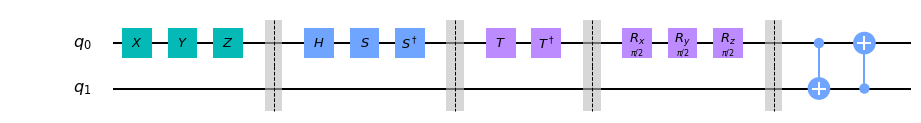

In [1]:
from qiskit import *
from math import *
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)
# Pauli gates
qc.x(0)
qc.y(0)
qc.z(0)
qc.barrier()
# Clifford gates
qc.h(0)
qc.s(0)
qc.sdg(0)
qc.barrier()
# C3 gates
qc.t(0)
qc.tdg(0)
qc.barrier()
# Standard Rotation gates
qc.rx(pi/2,0)
qc.ry(pi/2,0)
qc.rz(pi/2,0)
qc.barrier()
# CNOT
qc.cx(0,1)
qc.cx(1,0)

qc.draw(output='mpl')

* ***Example 1:*** Decomposition of Controlled-V gate
<center>
<img src="images/Controlled_v_gate.PNG" alt="Controlled V gate" style="width: 90px;"/>
</center>

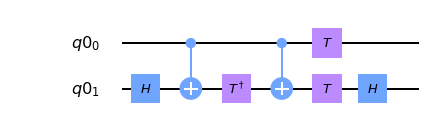

In [2]:
q = QuantumRegister(2)
Controlled_V = QuantumCircuit(q)
# Decomposition of Controlled-V gate
Controlled_V.h(1)
Controlled_V.cx(0,1)
Controlled_V.tdg(1)
Controlled_V.cx(0,1)
Controlled_V.t(q)
Controlled_V.h(1)

Controlled_V.draw(output='mpl')

* ***Example 2:*** Decomposition of Controlled-V+ gate
<center>
<img src="images/Controlled_V+_gate.png" alt="Controlled V+ gate" style="width: 90px;"/>
</center>

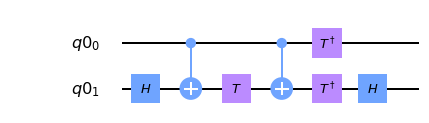

In [3]:
Controlled_Vdg = QuantumCircuit(q)
# Decomposition of Controlled-V+ gate
Controlled_Vdg.h(1)
Controlled_Vdg.cx(0,1)
Controlled_Vdg.t(1)
Controlled_Vdg.cx(0,1)
Controlled_Vdg.tdg(q)
Controlled_Vdg.h(1)

Controlled_Vdg.draw(output='mpl')

* ***Example 3:*** Decomposition of Toffoli gate
<center>
<img src="images/Toffoli_gate.PNG" alt="Toffoli gate" style="width: 67px;"/>
</center>

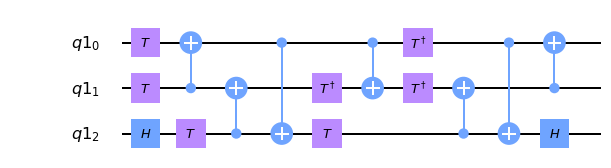

In [4]:
q = QuantumRegister(3)
Toffoli_Gate = QuantumCircuit(q);
# Decomposition of Toffoli gate
Toffoli_Gate.h(2)
Toffoli_Gate.t(q)
Toffoli_Gate.cx(1,0)
Toffoli_Gate.cx(2,1)
Toffoli_Gate.cx(0,2)
Toffoli_Gate.tdg(1)
Toffoli_Gate.cx(0,1)
Toffoli_Gate.tdg(0)
Toffoli_Gate.tdg(1)
Toffoli_Gate.t(2)
Toffoli_Gate.cx(2,1)
Toffoli_Gate.cx(0,2)
Toffoli_Gate.cx(1,0)
Toffoli_Gate.h(2)

Toffoli_Gate.draw(output='mpl')


#### 2.2. Step two: Mapping logical qubits to physical qubits

After decomposing the quantum circuit to the elementary gates, map each logical qubit to a physical qubit based on the suitable architecture. The mapping operation is usually done directly for the single qubit gates while it is maybe not direct for the CNOT gates because CNOT gates cannot be implemented directly if there isn't a connection path between the qubits. Because the mapping operation must satisfy the CNOT constrains, the circuit is divided into layers, each layer has the same required constrains to map the CNOT gates and these constraints are handled using SWAP operation to SWAP the logical qubits over the physical qubits to satisfy each constrains. The aim is to reduce the SWAP operations and the elementary gates as possible.

* ***Example 1: SWAP Gate***

Let's take the SWAP gate as an example for the mapping step, the SWAP gate (on the left of the barrier) is decomposed using 3 CNOT gates (the middle part). To implement these CNOT gates on QX2 architecture, assume the logical qubits $q_0$,$q_1$ are mapped to the physical qubits $Q_0$,$Q_1$. Based on QX2 architecture, the first and last CNOT gates can be implemented directly because there is an arrow from $Q_0$ to $Q_1$ while the middle CNOT gate has to be flipped because there is not an arrow on the reverse direction. Flipping CNOT gate is done by applying $H$ gate before and after the gate. The final decomposition of the SWAP gate is shown in the right part of the barrier with 7 elementary gates.

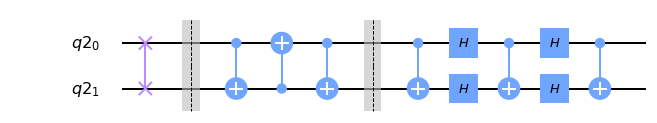

In [5]:
q = QuantumRegister(2);
SWAP_Gate = QuantumCircuit(q);
# Original
SWAP_Gate.swap(0,1)
SWAP_Gate.barrier()
# Decomposition 1
SWAP_Gate.cx(0,1)
SWAP_Gate.cx(1,0)
SWAP_Gate.cx(0,1)
SWAP_Gate.barrier()
# Decomposition 2
SWAP_Gate.cx(0,1)
SWAP_Gate.h(q)
SWAP_Gate.cx(0,1)
SWAP_Gate.h(q)
SWAP_Gate.cx(0,1)

SWAP_Gate.draw(output='mpl')

* ***Example 2:***

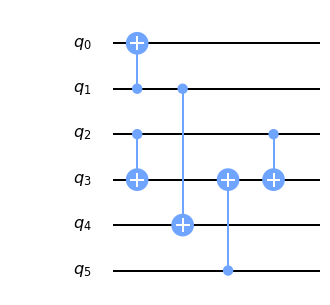

In [6]:
qc = QuantumCircuit(6)

qc.cx(1,0)
qc.cx(2,3)
qc.cx(1,4)
qc.cx(5,3)
qc.cx(2,3)

qc.draw(output='mpl')

This circuit is ready to be mapped with satisfying The CNOT constrains. Using QX3 architecture, assume the logical qubits $q_0$, $q_1$, $q_2$, $q_3$, $q_4$, and $q_5$ are mapped to the physical qubits $Q_0$, $Q_1$, $Q_2$, $Q_3$, $Q_{14}$, and $Q_{15}$ respectively. To satisfy the CNOT constrains on QX3 architecture, the circuit is divided into three layers, each layer with the same constraints as possible.

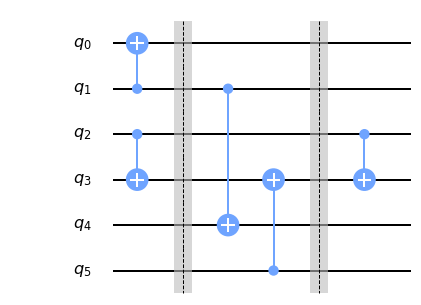

In [7]:
qc = QuantumCircuit(6)

qc.cx(1,0)
qc.cx(2,3)
qc.barrier()
qc.cx(1,4)
qc.cx(5,3)
qc.barrier()
qc.cx(2,3)

qc.draw(output='mpl')

For the first layer gates, CNOT($q_2$,$q_3$) gate is implemented directly on $Q_2$,$Q_3$ while CNOT($q_0$,$q_1$) is flipped using additional of four $H$ gates.

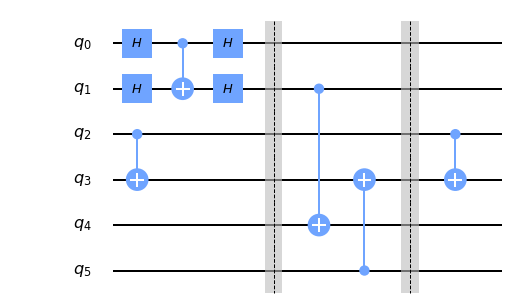

In [8]:
qc = QuantumCircuit(6)

qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.cx(2,3)
qc.barrier()
qc.cx(1,4)
qc.cx(5,3)
qc.barrier()
qc.cx(2,3)

qc.draw(output='mpl')

The second layer gates cannot be implemented directly so, SWAP operations are used to swap logical gates over the physical qubits to satisfyies QX3 architecture.

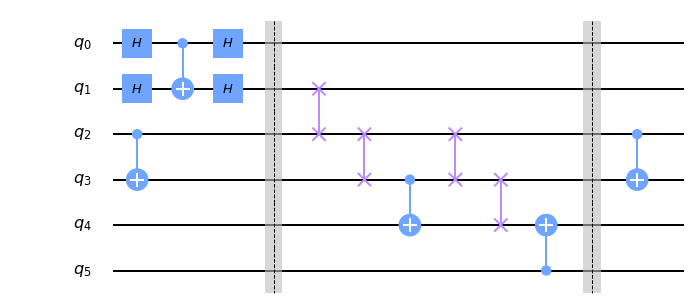

In [9]:
qc = QuantumCircuit(6)

qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.cx(2,3)
qc.barrier()
qc.swap(1,2)
qc.swap(2,3)
qc.cx(3,4)
qc.swap(2,3)
qc.swap(3,4)
qc.cx(5,4)
qc.barrier()
qc.cx(2,3)

qc.draw(output='mpl')

For the third layer, two more swaps are required to implement the CNOT gate.

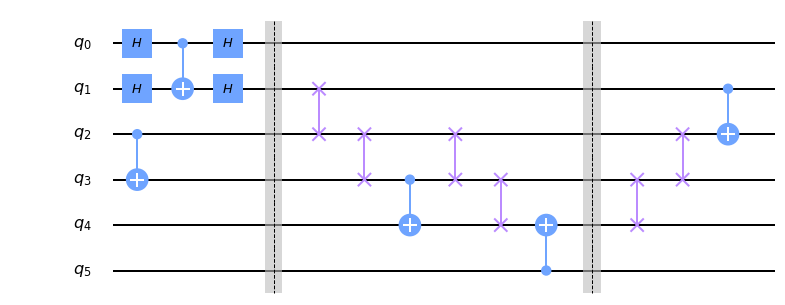

In [10]:
qc = QuantumCircuit(6)

qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.cx(2,3)
qc.barrier()
qc.swap(1,2)
qc.swap(2,3)
qc.cx(3,4)
qc.swap(2,3)
qc.swap(3,4)
qc.cx(5,4)
qc.barrier()
qc.swap(3,4)
qc.swap(2,3)
qc.cx(1,2)

qc.draw(output='mpl')

The circuit mapping in details: 

<img src="images/Circuit1.png" alt="Example 2 circuit mapping with more details" style="width: 500px;"/>

[Reference](https://ieeexplore.ieee.org/document/8382253)

For more optimization the circuit mapping can be as the following:

<img src="images/Circuit2.png" alt="Example 2 circuit mapping optimization" style="width: 400px;"/>

[Reference](https://ieeexplore.ieee.org/document/8382253)


In [11]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright